In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset splits

train = pd.read_csv("../../data/splits/train_split.csv")
test = pd.read_csv("../../data/splits/test_split.csv")
val = pd.read_csv("../../data/splits/val_split.csv")


In [5]:
def plot_class_distribution(split, title, axis):
    sns.countplot(y=split["phase"], order=split["phase"].value_counts().index, ax=axis, color="royalblue")
    axis.set_title(title)
    axis.set_xlabel("Count")
    axis.set_ylabel("Phase Label")

In [6]:
# Function to calculate and plot average frames per video
def plot_avg_frames_per_video(train, val, test, ax):
    train_avg = train.groupby("video_id")["frame_number"].count().mean()
    val_avg = val.groupby("video_id")["frame_number"].count().mean()
    test_avg = test.groupby("video_id")["frame_number"].count().mean()

    avg_frames = pd.DataFrame({
        "Split": ["Train", "Validation", "Test"],
        "Avg Frames Per Video": [train_avg, val_avg, test_avg]
    })

    sns.barplot(x="Split", y="Avg Frames Per Video", data=avg_frames, ax=ax, palette="Blues")
    ax.set_title("Average Frames Per Video in Each Split")
    ax.set_ylabel("Average Frame Count")

In [7]:
# Define consistent colors for each phase
phase_colors = {
    "unknown": "royalblue",
    "uva pick up": "darkorange",
    "suture tie": "forestgreen",
    "uva pull through": "red",
    "2 arms placing": "purple",
    "suture pull through": "brown",
    "suture pick up": "magenta",
    "placing rings 2 arms": "cyan",
    "1 arm placing": "gold",
    "pull off": "pink",
    "placing rings": "lime",
    "pull through": "gray",
    "uva tie" : "yellow"
}


#  Function to plot a pie chart without labels or percentages
def plot_pie_chart(df, title, ax):
    phase_counts = df["phase"].value_counts()
    colors = [phase_colors.get(phase, "black") for phase in phase_counts.index]  # Use predefined colors
    wedges, _ = ax.pie(
        phase_counts, startangle=90, colors=colors  # No labels or percentages
    )
    ax.set_title(title)
    return wedges

In [8]:
output_path = "../../reports/visuals/training_splits/training_splits.png"

/tmp/ipykernel_22647/1323427840.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Split", y="Avg Frames Per Video", data=avg_frames, ax=ax, palette="Blues")


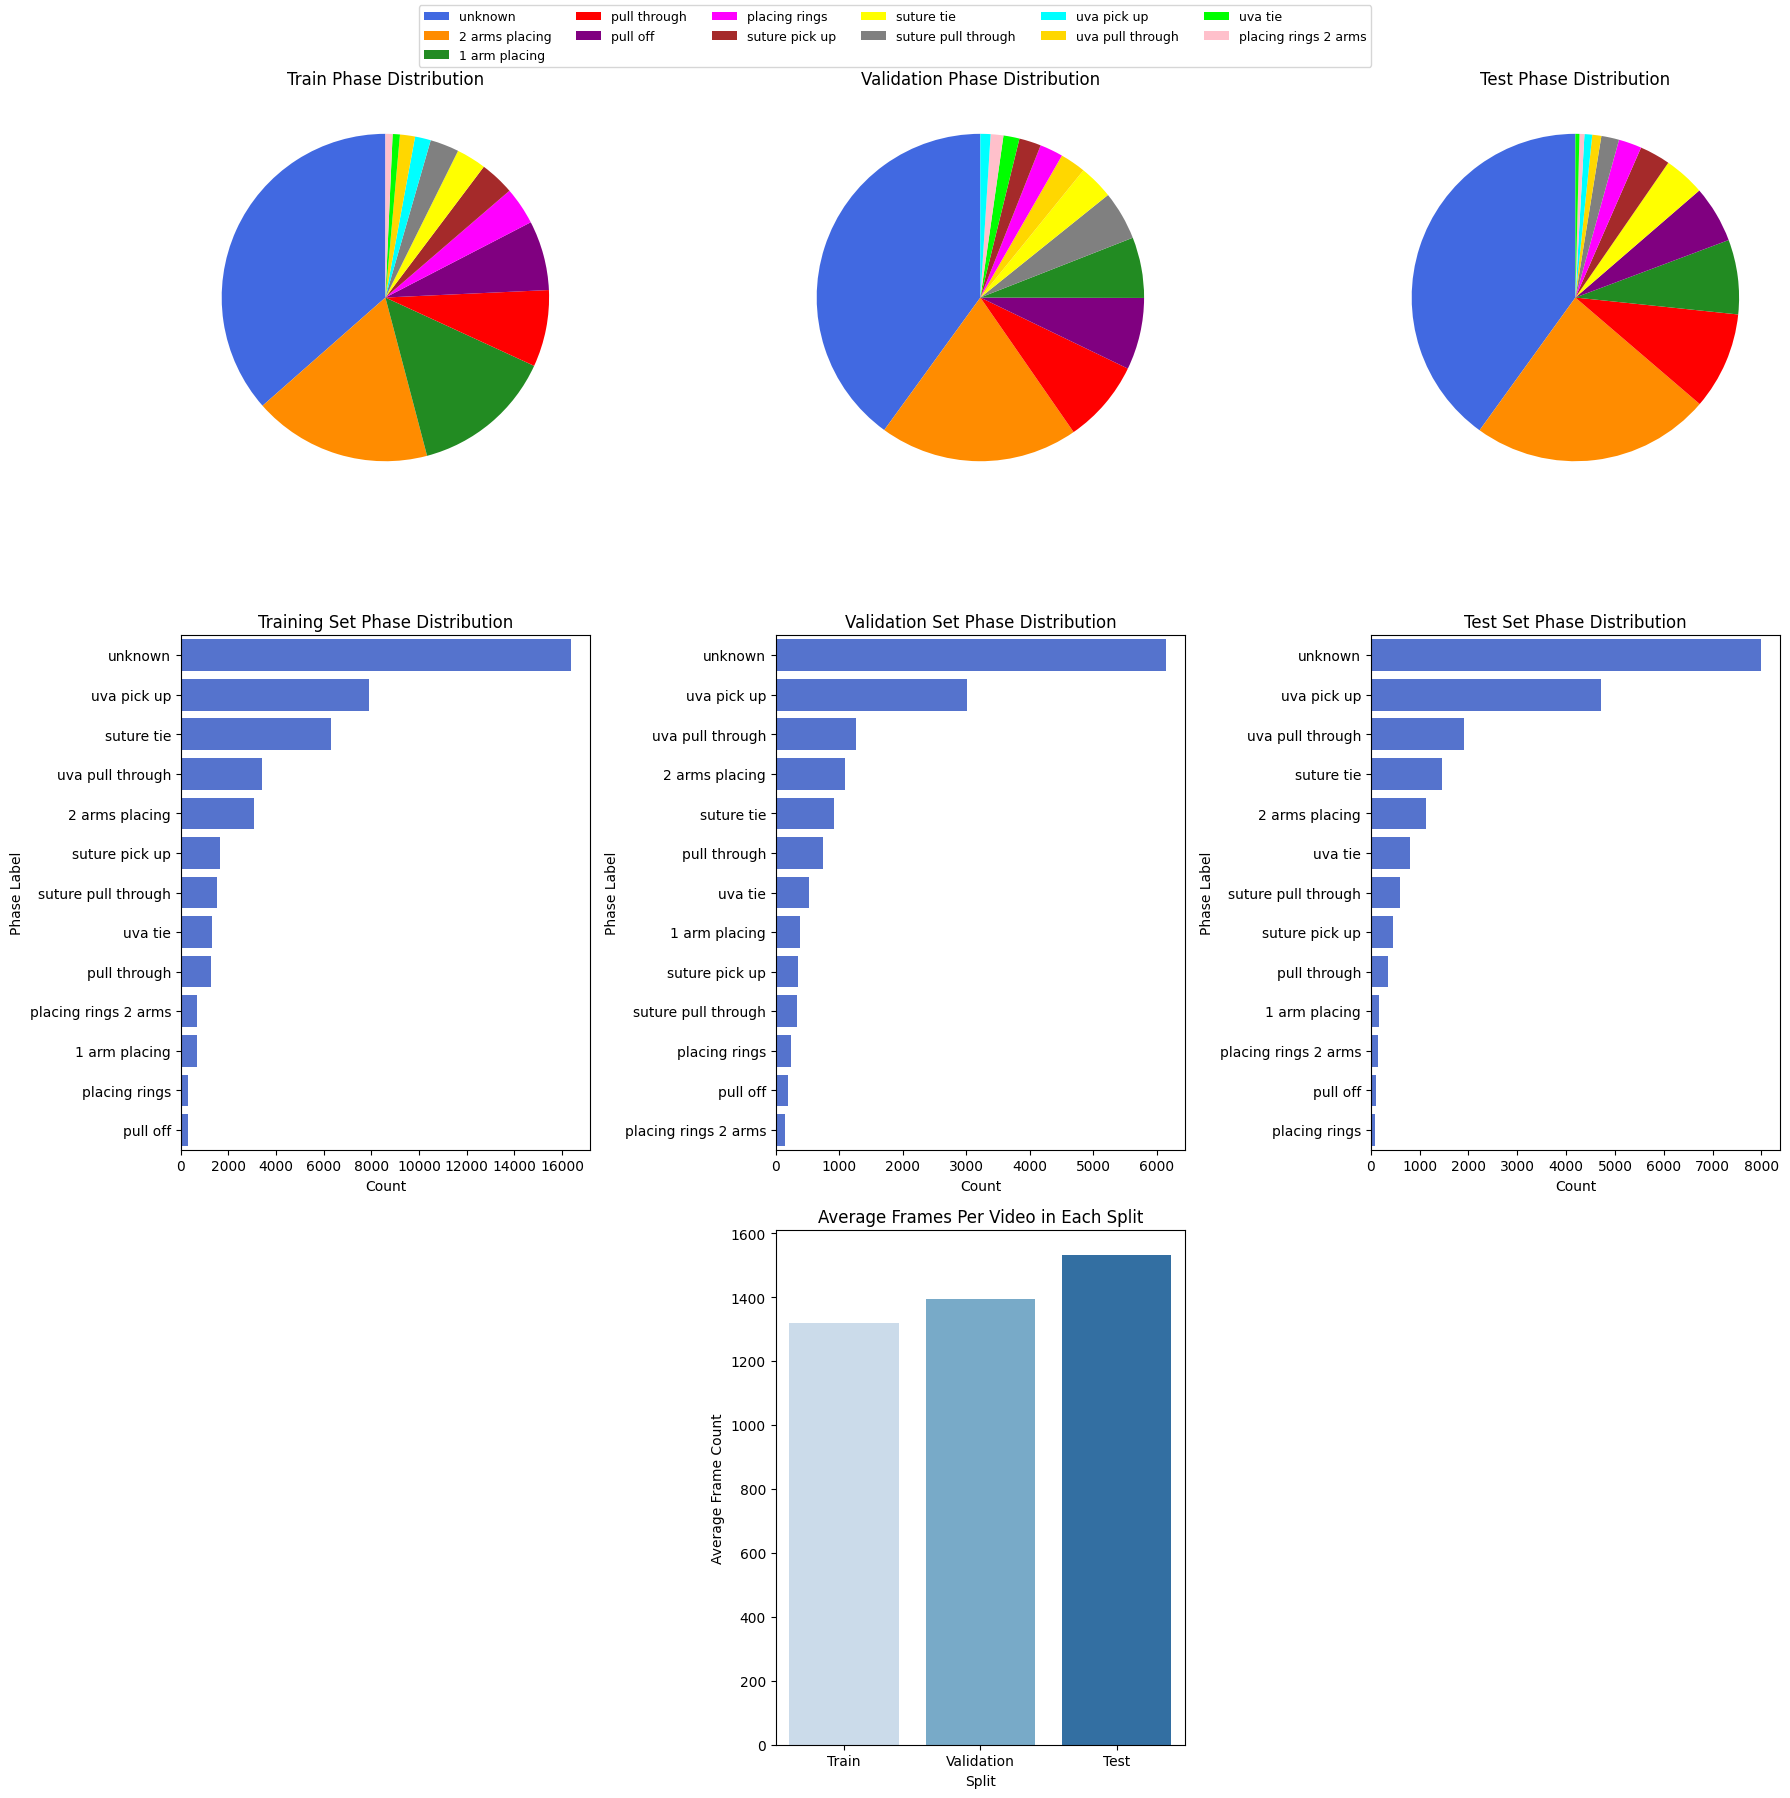

In [9]:
# Create figure with corrected layout (Pie Charts + Legend on Top, Phase Bars in Middle, Frame Distribution at Bottom)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# **Row 1: Phase Distribution Pie Charts**
wedges_train = plot_pie_chart(train, "Train Phase Distribution", axes[0, 0])
plot_pie_chart(val, "Validation Phase Distribution", axes[0, 1])
plot_pie_chart(test, "Test Phase Distribution", axes[0, 2])

# **Unified Legend for Pie Charts at the Top**
fig.legend(wedges_train, train["phase"].unique(), loc="upper center", ncol=6, fontsize=9)

# **Row 2: Phase Distribution Bar Charts**
plot_class_distribution(train, "Training Set Phase Distribution", axes[1, 0])
plot_class_distribution(val, "Validation Set Phase Distribution", axes[1, 1])
plot_class_distribution(test, "Test Set Phase Distribution", axes[1, 2])

# **Row 3: Average Frames Per Video → Span all three columns**
plot_avg_frames_per_video(train, val, test, axes[2, 1])
fig.delaxes(axes[2, 0])  # Remove left empty axis
fig.delaxes(axes[2, 2])  # Remove right empty axis

# Save plots before displaying
plt.savefig(output_path, dpi=300, bbox_inches="tight")


plt.tight_layout()
plt.show()


In [13]:


# Count frames per video
frames_per_video = train.groupby("video_id")["file_path"].count()

# Count unique phases per video
phases_per_video = train.groupby("video_id")["phase"].nunique()

# Merge both statistics into one DataFrame
stats_df = pd.DataFrame({
    "num_frames": frames_per_video,
    "num_phases": phases_per_video
})

# Display results
print(stats_df)

# Save results to a CSV file
output_file = "../..reports/train_split_info.csv"
stats_df.to_csv(output_file)
print(f"Saved frame and phase statistics per video to {output_file}")


             num_frames  num_phases
video_id                           
0002_21             561           3
0002_22             465           3
0002_23             309           2
0002_24            2073           4
0002_29_X28        1155           4
0002_30            4521           4
0003_21            1059           3
0003_23             330           3
0003_24            3006           4
0003_29            2433           4
0004_21             780           3
0004_22             609           3
1000_21             486           3
1000_22             309           3
1000_23             210           3
1000_26_X25         321           3
1000_28_X27         192           2
1003_26             477           3
1003_29            1314           4
1004_23             213           2
1004_26_X25         510           3
1004_27_X26         579           3
1004_31            4182           4
1005_30            3918           4
1006_21             912           3
1006_23             201     

OSError: Cannot save file into a non-existent directory: 'reports'